In [1]:
# Importation des Bibliothèques afin de commencer notre analyse

In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import missingno as msno
import scipy.stats as st

# Description des jeux de données 

In [5]:
# Importation des différents fichiers à analyser 

In [6]:
data_liaison = pd.read_csv('liaison.csv',sep=";")
data_erp= pd.read_csv('erp.csv',sep=";")
data_web = pd.read_csv("web.csv", sep=";")

In [7]:
# On vérifie ensuite nos différents fichiers à notre disposition

In [8]:
data_liaison.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [9]:
data_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [10]:
data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

# On peut voir que product_id est en int64 or c'est une donnée qualitative et non quantitative nous allons donc modifier le type

In [11]:
data_liaison['product_id']=data_liaison['product_id'].astype(object)
data_erp['product_id']=data_erp['product_id'].astype(object)

In [12]:
data_liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


# Deux lignes ont des Id_web différent la 822(14680-1) et 823(13127-1) à voir si après la jointure les lignes ont des concordances 

# On peut voir que l'id_web n'a pas de concordance dans les autres fichiers car il correspond à sku 

In [13]:
data_liaison=data_liaison.rename(columns={'id_web':'sku'})
data_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [64]:
data_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [14]:
data_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


# Deux lignes semblent ne pas correspondre bon-cadeau-25-euros,13127-1 une est en commun avec le fichier précédant

# On peut voir que sur le fichier web les formats date ne sont pas respecté se sont des datetime et non des object

In [15]:
data_web['post_date']=pd.to_datetime(data_web['post_date'], errors='coerce')
data_web['post_date_gmt']=pd.to_datetime(data_web['post_date_gmt'], errors='coerce')
data_web['post_modified']=pd.to_datetime(data_web['post_modified'], errors='coerce')
data_web['post_modified_gmt']=pd.to_datetime(data_web['post_modified_gmt'], errors='coerce')


# Post author n'est pas un float 

In [16]:
data_web['post_author']=data_web['post_author'].astype(object)

In [17]:
data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   object        
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

# Analyse des Nan et valeur null

In [18]:
# Nous allons déterminer grâce à une représentation graphique les colonnes que nous allons garder pour notre analyser 
#sachant que les colonnes ou les données sont inférieur ou égal à 50% ne seront pas garder

<AxesSubplot: >

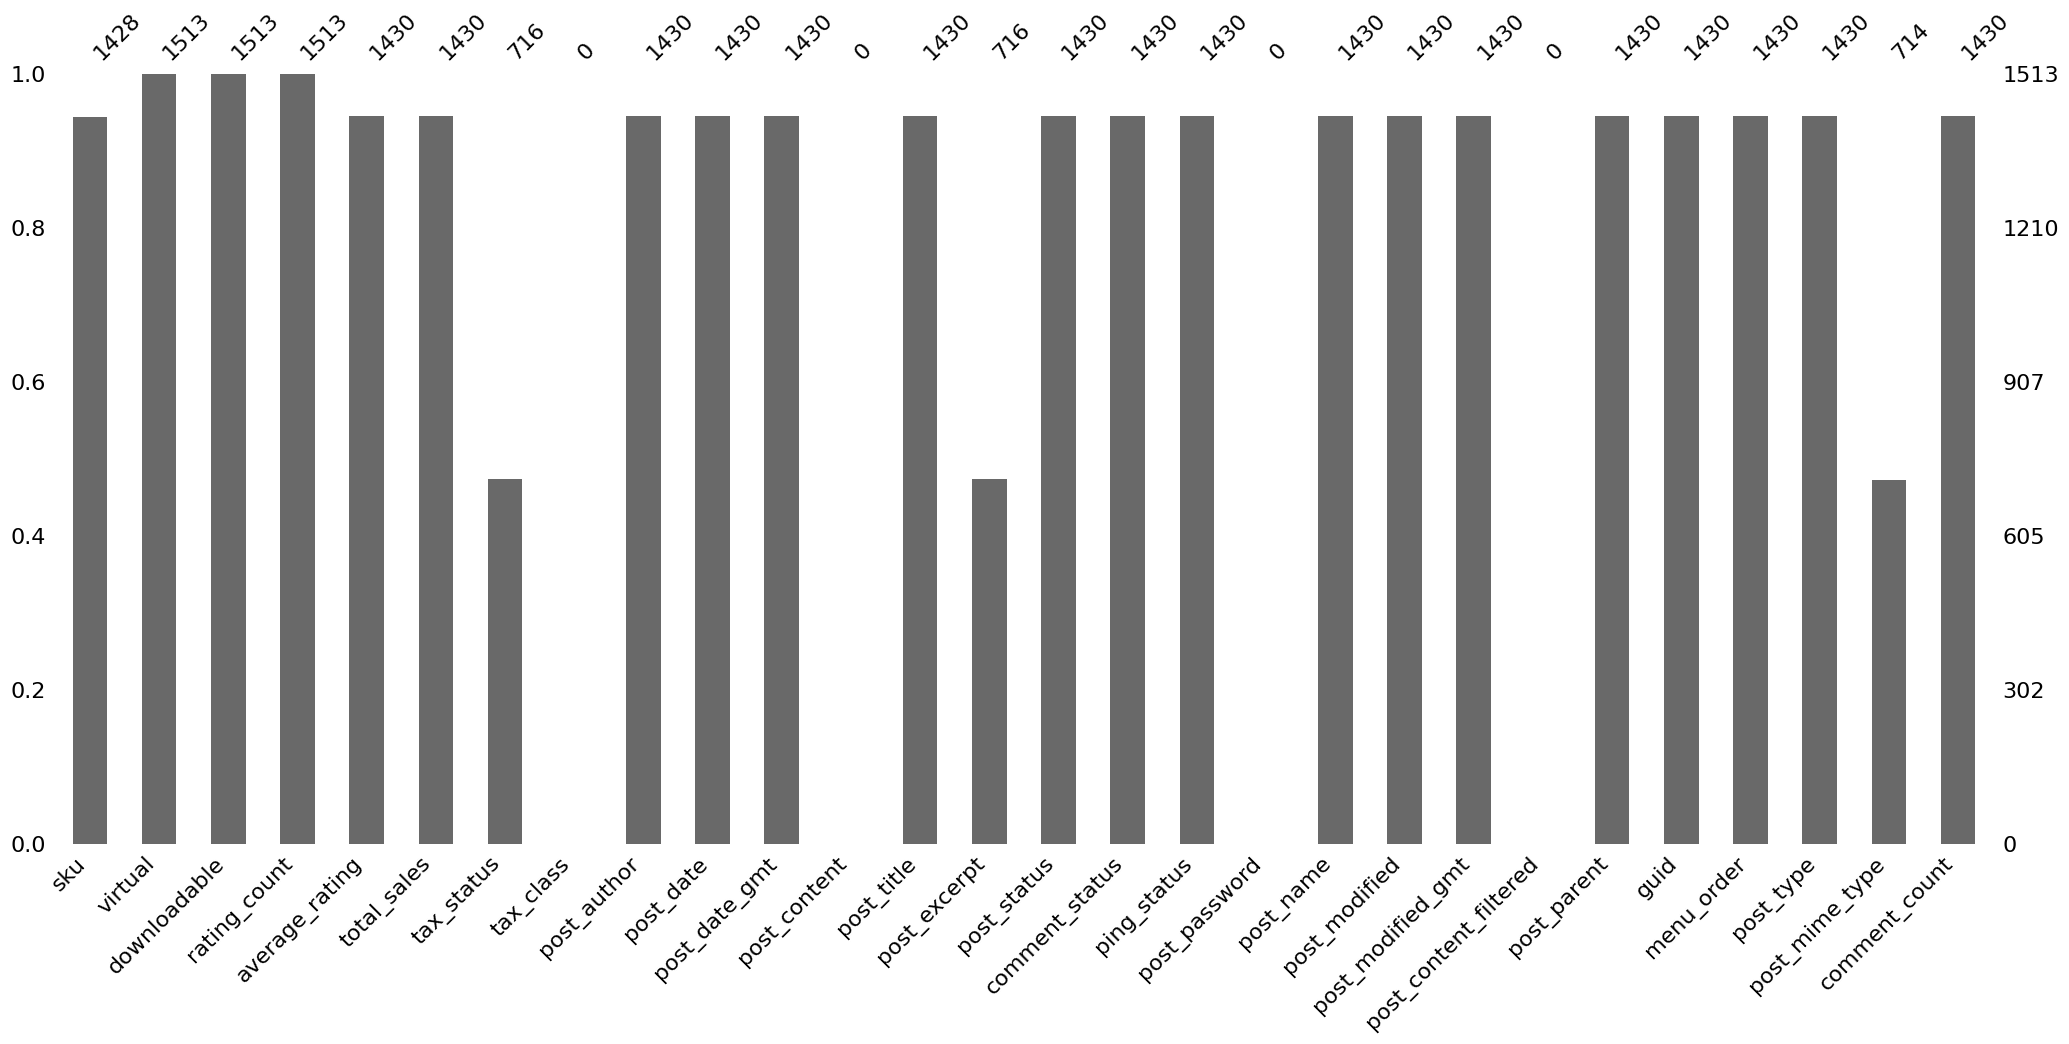

In [19]:
msno.bar(data_web)

<AxesSubplot: >

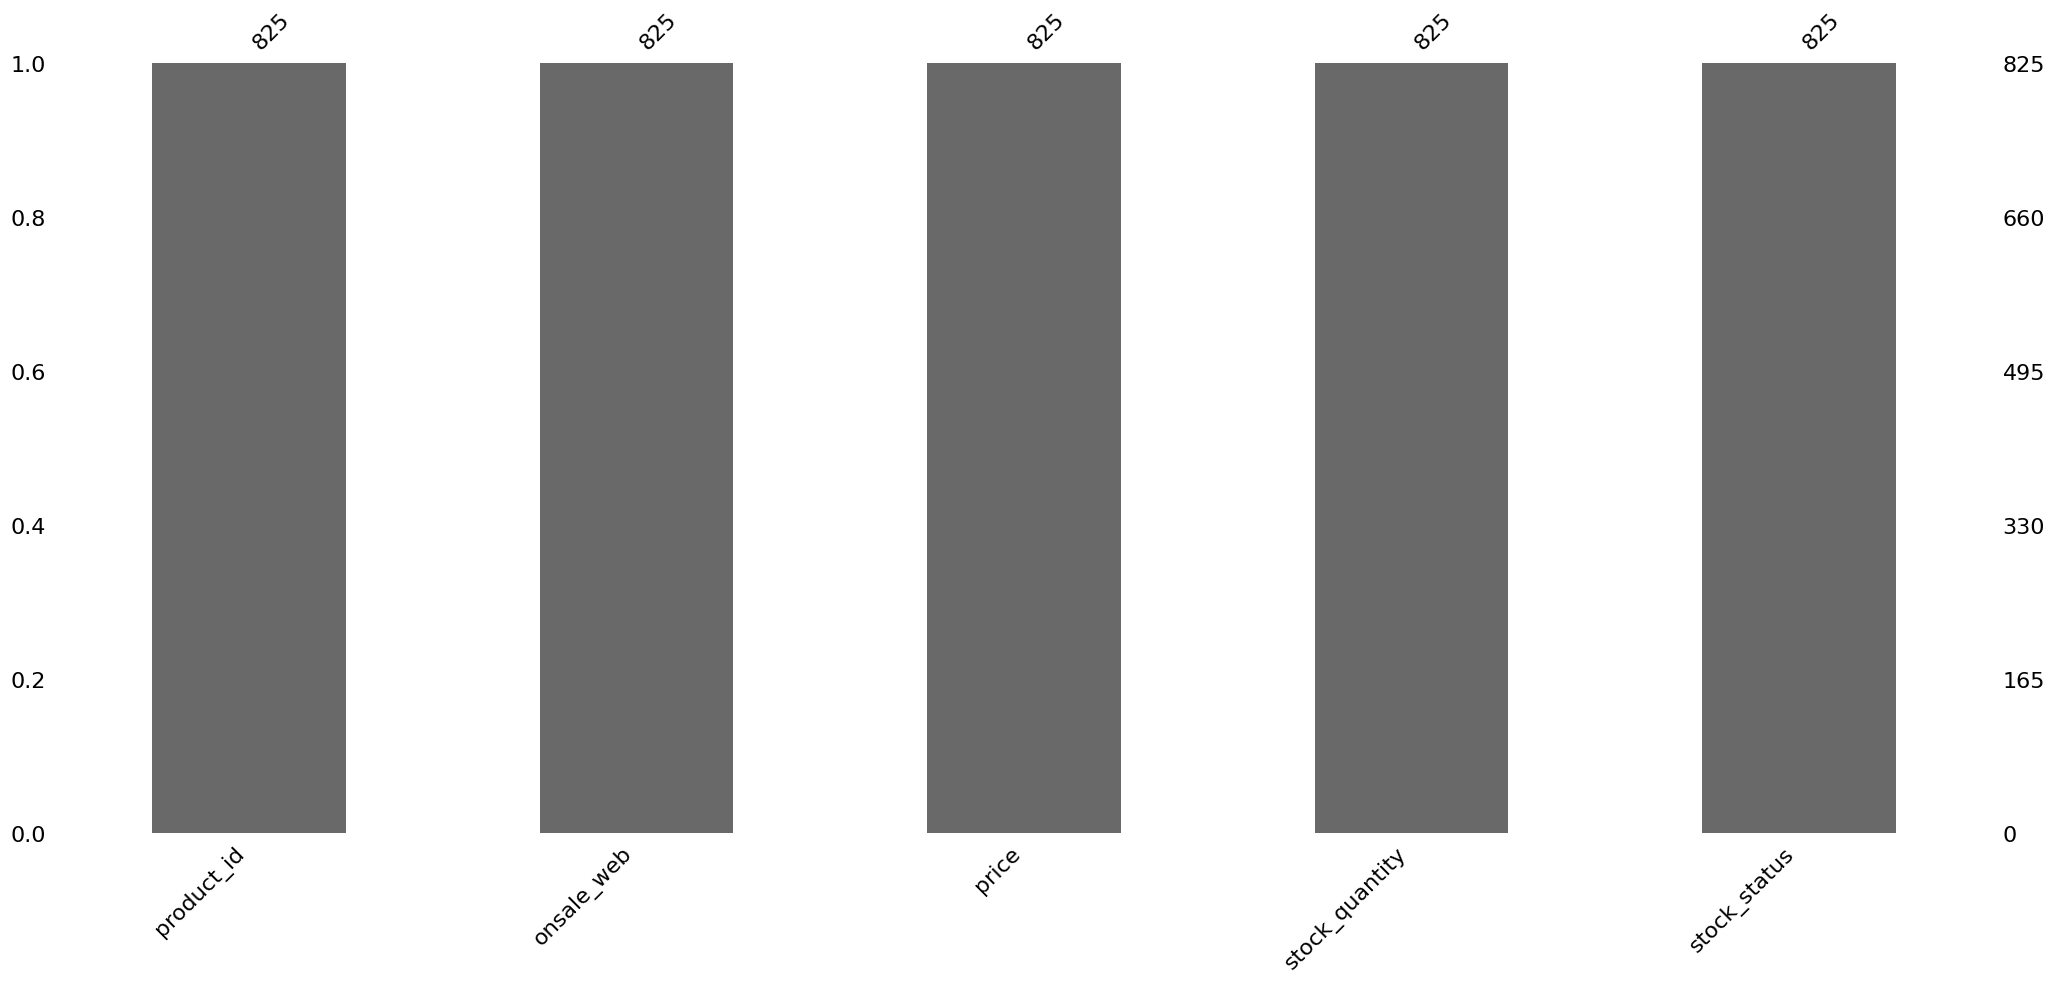

In [20]:
msno.bar(data_erp)

<AxesSubplot: >

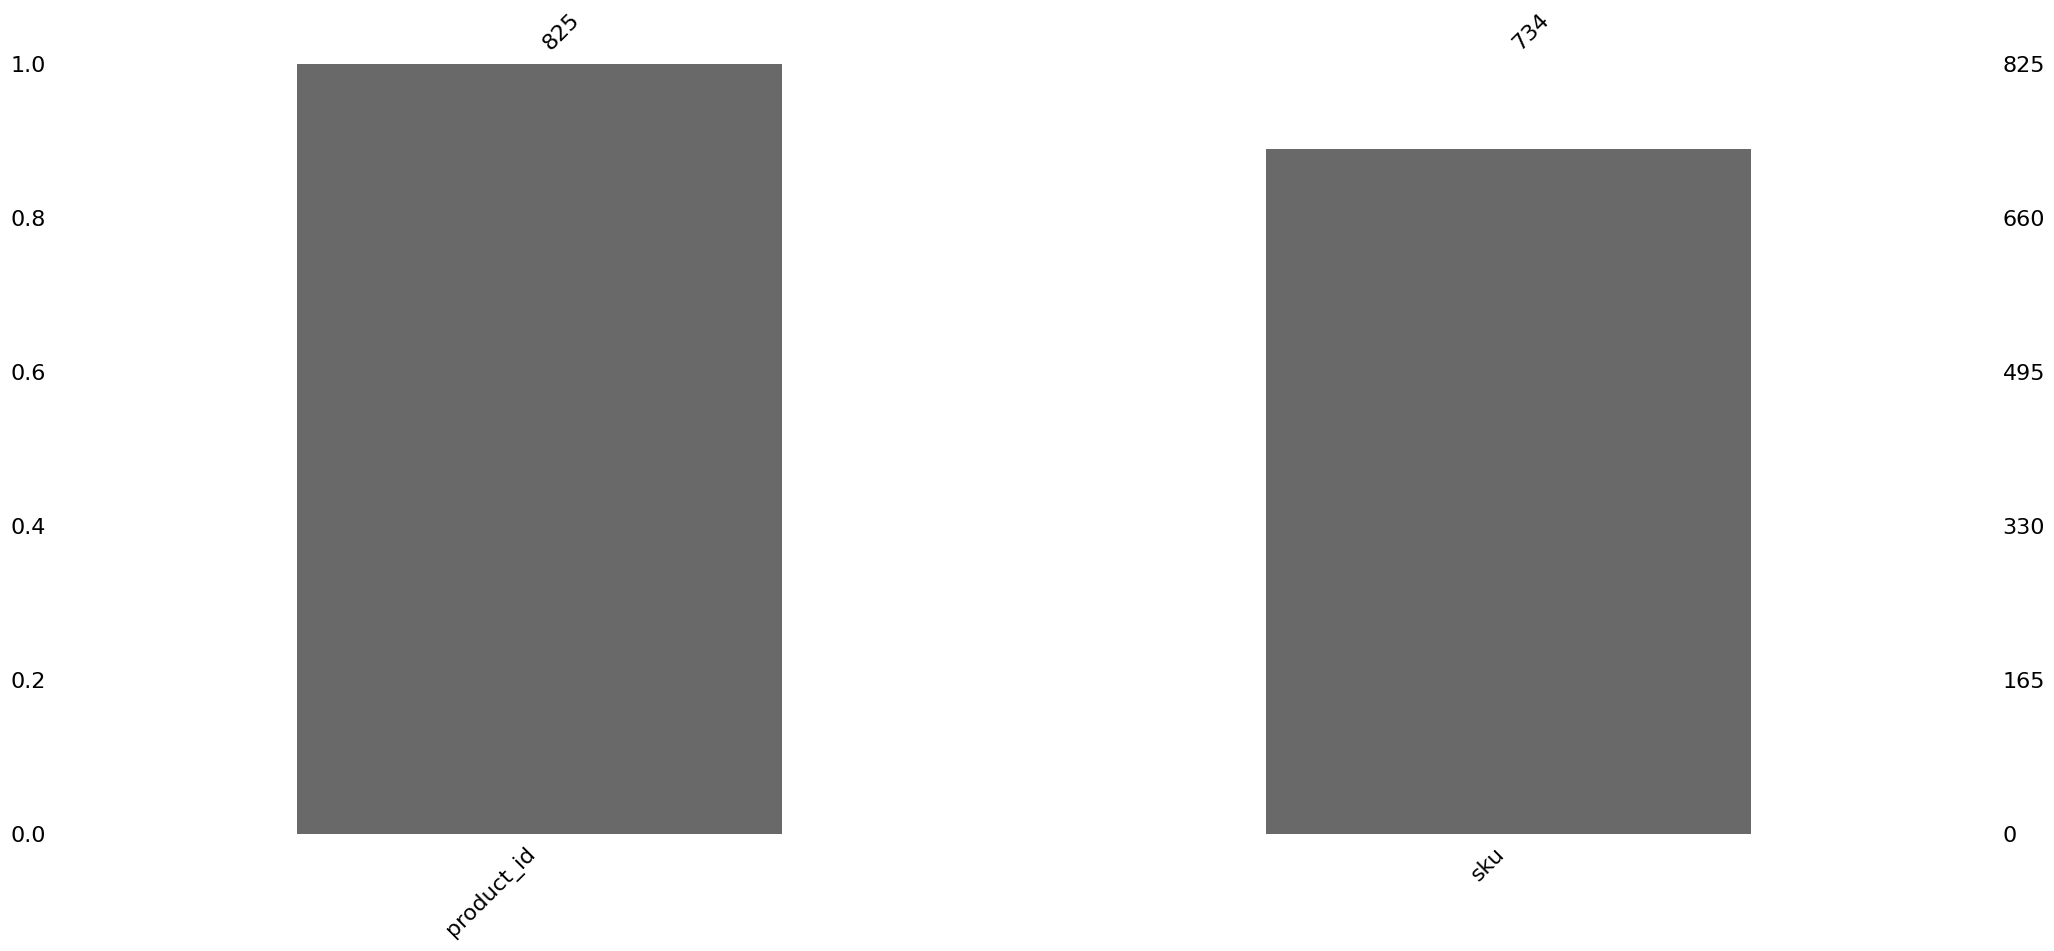

In [21]:
msno.bar(data_liaison)

#  On va maintenant suprimmer les Nan et vérifier les doublons

In [22]:
data_erp.loc[data_erp['product_id'].isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status


In [23]:
data_liaison.loc[data_liaison['sku'].isnull()]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [24]:
data_liaison=data_liaison.loc[data_liaison['sku'].notnull()]
data_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [25]:
# Nous allons voir que nous avons des lignes de total_sales qui sont entièrement vide et que nous ne pourrons donc pas traiter
data_web.loc[data_web['sku'].isnull()]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data_web_final=data_web.loc[data_web['sku'].notnull()]
data_web_final

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


# De nombreuses colonnes dont les valeurs sont des NaN ou 0 pourrait être retirer virtual,downloadable,rating_count,average_rating,post_content_filtered,post_parent,menu_order,comment_count...

In [27]:
# On peut voir 2 lignes qui à des données qui ne correspondent pas à la représentation faite sur les autres lignes il faut donc la supprimer

In [28]:
data_web_final=data_web_final.drop(columns=['virtual','downloadable','rating_count','average_rating','post_content_filtered','post_parent','menu_order','comment_count','tax_class','post_content_filtered','post_password','post_content','tax_status','post_excerpt','post_mime_type'])
data_web_final

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [29]:
# On vérifie qu'il n'y a pas de doublon dans notre fichier
data_web_final.loc[data_web_final.duplicated(subset='sku',keep='last'),:]

,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
767,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
768,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
797,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [30]:
# On supprime les doublons 
data_web_final.drop_duplicates(subset=['sku'], inplace=True, ignore_index=True)

In [48]:
data_erp.loc[data_erp.duplicated(subset='product_id',keep='last'),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [49]:
data_liaison.loc[data_liaison.duplicated(subset='sku',keep='last'),:]

,product_id,sku


In [31]:
# Après correction des différentes erreurs nous allons pouvoir commencer à faire des jointures sur nos fichiers 

# Jointure

In [32]:
# On commencera par une jointure sur les fichiers Erp et liaison qui ont une clé commune qui est product_id
Erp_final=pd.merge(data_erp,data_liaison, how='inner', on=['product_id'] )
Data_final=pd.merge(Erp_final,data_web_final, how='right',on=['sku'])
Data_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,3849,1,34.3,0,outofstock,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,3850,1,20.8,0,outofstock,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
710,7023,1,27.5,15,instock,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
711,7025,1,69.0,2,instock,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
712,7247,1,54.8,23,instock,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product


In [33]:
# On vérifie que nous n'avons plus de colonne avec des valeurs null
print(Data_final.isnull().sum())


product_id           0
onsale_web           0
price                0
stock_quantity       0
stock_status         0
sku                  0
total_sales          0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
guid                 0
post_type            0
dtype: int64


# Calcul des Chiffres d'affaires

In [34]:
# On peut déterminer maintenant le CA par produit 
Data_final['Vente_produit']=Data_final['price']*Data_final['total_sales']
Data_final

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_date_gmt,post_title,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,Vente_produit
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,250.0
1,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,145.2
2,3849,1,34.3,0,outofstock,15296,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
3,3850,1,20.8,0,outofstock,15300,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
4,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,5.0,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,publish,closed,closed,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,42.0
710,7023,1,27.5,15,instock,15891,0.0,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,publish,closed,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
711,7025,1,69.0,2,instock,15887,0.0,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,publish,closed,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
712,7247,1,54.8,23,instock,13127-1,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,publish,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


In [35]:
# On regroupe Nos produits en fonction de leur nom et de leur id
Data_final.groupby(['post_title','product_id'])['Vente_produit'].sum()


post_title                                                                product_id
Agnès Levet Côte Rôtie Améthyste 2017                                     5826          164.8
Agnès Levet Côte Rôtie Maestria 2017                                      5827          165.0
Agnès Levet Côte Rôtie Péroline 2017                                      5829          171.0
Alain Graillot Crozes-Hermitage Blanc 2018                                4920          244.0
Alain Graillot Crozes-Hermitage Rouge 2017                                4919          146.4
                                                                                        ...  
Zind-Humbrecht Pinot Gris Roche Calcaire 2017                             4130            0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014                               5969            0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017  4115            0.0
Zind-Humbrecht Riesling Herrenweg de Turckheim 2017                  

In [36]:
# Calcul du Ca 
Ca_Produit=Data_final['Vente_produit'].sum()
print("Le chiffre d'affaire est de",Ca_Produit,"€")

Le chiffre d'affaire est de 70568.6 €


In [37]:
# Calcul du Ca en ligne
Data_final['Ca_Web']= Data_final.loc[Data_final['onsale_web']==1,'price']*Data_final.loc[Data_final['onsale_web']==1,'total_sales']
Data_final.groupby(['post_title','product_id'])['Ca_Web'].sum()

post_title                                                                product_id
Agnès Levet Côte Rôtie Améthyste 2017                                     5826          164.8
Agnès Levet Côte Rôtie Maestria 2017                                      5827          165.0
Agnès Levet Côte Rôtie Péroline 2017                                      5829          171.0
Alain Graillot Crozes-Hermitage Blanc 2018                                4920          244.0
Alain Graillot Crozes-Hermitage Rouge 2017                                4919          146.4
                                                                                        ...  
Zind-Humbrecht Pinot Gris Roche Calcaire 2017                             4130            0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014                               5969            0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017  4115            0.0
Zind-Humbrecht Riesling Herrenweg de Turckheim 2017                  

In [38]:
Data_final['Ca_Web'].sum()
print("Le chiffre d'affaire des ventes web est de ",Data_final['Ca_Web'].sum(),"€")

Le chiffre d'affaire des ventes web est de  70568.6 €


#On peut voir que le chiffre d'affaire des ventes de produits et de ventes web sont similaires, cela s'explique car il n'y a pas de distinction pour les ventes physiques on peut donc en conclure qu'il s'agit du CA globale.

# Autre Donnée Chiffrée

In [46]:
Panier_Moyen=Data_final['total_sales'].sum()
Panier_Moyen=round((Ca_Produit/Panier_Moyen),2)
print("Le panier moyen est de",Panier_Moyen,'€')

Le panier moyen est de 24.63 €


In [47]:
# On peut remarquer que sur les 714 lignes qui composent notre fichiers seulement 385 références on subit des ventes soit 54% de notre fichier épuré
Data_final.loc[Data_final['total_sales']>0,:]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_author,post_date,post_date_gmt,...,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,Vente_produit,Ca_Web
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,250.0,250.0
1,3847,1,24.2,0,outofstock,15298,6.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,...,publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,145.2,145.2
4,4032,1,14.1,0,outofstock,19814,3.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,42.3,42.3
8,4042,1,31.2,34,instock,16042,7.0,2.0,2018-02-12 09:54:27,2018-02-12 08:54:27,...,publish,closed,closed,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,218.4,218.4
9,4043,1,60.0,12,instock,14980,3.0,2.0,2018-02-12 10:03:05,2018-02-12 09:03:05,...,publish,closed,closed,pierre-gaillard-cote-rotie-esprit-blond-2017,2020-08-24 14:00:03,2020-08-24 12:00:03,https://www.bottle-neck.fr/?post_type=product&...,product,180.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,6665,1,27.7,8,instock,16068,1.0,2.0,2020-02-22 14:28:32,2020-02-22 13:28:32,...,publish,closed,closed,domaine-hauvette-igp-alpilles-jaspe-2017,2020-08-26 16:05:02,2020-08-26 14:05:02,https://www.bottle-neck.fr/?post_type=product&...,product,27.7,27.7
700,6738,1,15.4,40,instock,8193,3.0,2.0,2020-03-04 13:54:12,2020-03-04 12:54:12,...,publish,closed,closed,emile-boeckel-cremant-chardonnay-extra-brut-2016,2020-08-22 10:15:02,2020-08-22 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,46.2,46.2
707,6926,1,49.9,24,instock,15845,1.0,2.0,2020-04-25 12:43:23,2020-04-25 10:43:23,...,publish,closed,closed,chateau-jean-faure-saint-emilion-grand-cru-2016,2020-07-20 17:09:23,2020-07-20 15:09:23,https://www.bottle-neck.fr/?post_type=product&...,product,49.9,49.9
708,6928,1,19.0,20,instock,15741,2.0,2.0,2020-04-25 12:49:49,2020-04-25 10:49:49,...,publish,closed,closed,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,38.0,38.0


In [40]:
# Nous pouvons calculer le top 10 des produits les plus vendus
Meilleur_Vente=Data_final.loc[Data_final['onsale_web']==1]

In [41]:
Top_Meilleur_Vente=Meilleur_Vente[['sku','price','stock_status','total_sales','post_title']]
Top_Meilleur_Vente=Top_Meilleur_Vente.sort_values(by='total_sales',ascending=False,ignore_index=True)
Top_Meilleur_Vente.head(10)

,sku,price,stock_status,total_sales,post_title
0,7818,49.0,outofstock,96.0,Champagne Gosset Grand Blanc de Blancs
1,1662,49.0,instock,87.0,Champagne Gosset Grand Rosé
2,16416,16.6,instock,62.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019
3,16295,5.8,instock,46.0,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...
4,16210,5.7,instock,43.0,Maurel Pays d'Oc Chardonnay 2019
5,16189,13.3,instock,42.0,Le Pas de l'Escalette Languedoc Les Petits Pas...
6,16580,25.2,instock,41.0,Domaine Giudicelli Patrimonio Blanc 2019
7,304,39.0,instock,40.0,Champagne Gosset Grande Réserve
8,16264,10.9,instock,38.0,Château de La Liquière Faugères L'Ampoule 2019
9,38,8.6,instock,38.0,Emile Boeckel Crémant Brut Blanc de Blancs


Text(0.5, 1.0, 'Analyse entre deux variables quantitatives')

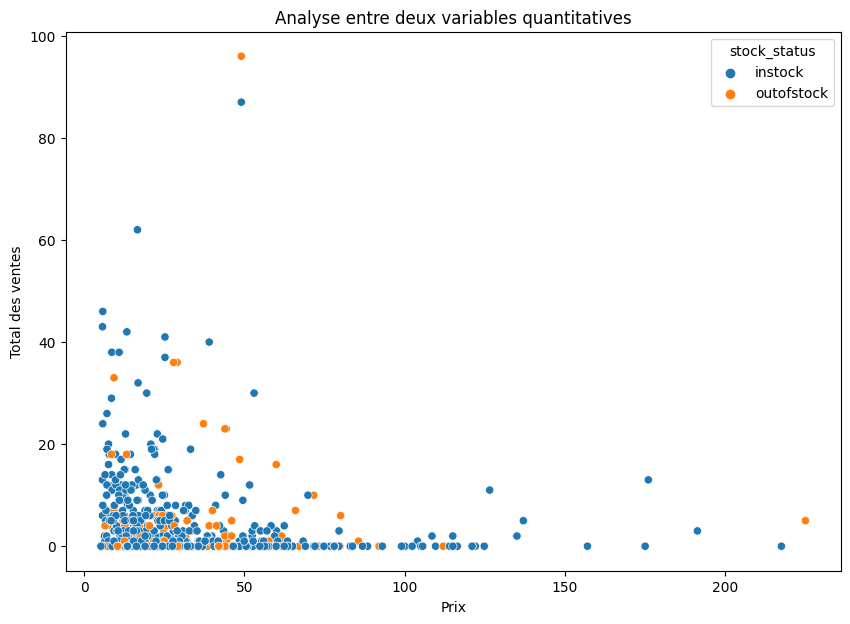

In [42]:
# Il est possible de faire une représentation graphique entre nos deux variables prix et le total des ventes nous permettant de voir la concentration mais aussi les outliers
plt.figure(figsize=(10,7))
sns.scatterplot(data=Data_final,x='price',y='total_sales',hue='stock_status')
plt.xlabel('Prix')
plt.ylabel('Total des ventes')
plt.title('Analyse entre deux variables quantitatives')

#Malgrè une représentation peu lisible nous pouvons voir que la majeur partie de la concentration ce fait entre 0 et 50 €en terme de prix, qu'en au total de ventes nous qu'il reste dans la grande majeur partie en dessous de 20 ventes par produits

In [43]:
print(round(st.pearsonr(Data_final["price"],Data_final["total_sales"])[0],2))


-0.13


#Le coefficient de pearson permet de vérifier si il ya une relation linéaire entre 2 variables dans notre cas elle est négative et démontre une absence de relation

In [41]:
print(round(np.cov(Data_final["price"],Data_final["total_sales"],ddof=0)[1,0],2))

-31.55


#La covariance est une mesure de l’association ou du lien qui existe entre deux variables.
Si la valeur de la covariance est de signe négatif cela signifie que les variables varient en sens inverse : les sujets qui ont des valeurs fortes sur une des deux variables auront tendance à avoir des valeurs faibles sur l'autre variable

In [53]:
# Nous pouvons à présent terminer notre étude avec la fréquence d'achat par rapport à la colonne date qui nous ai fournis dans notre Dataframe
Data_final['quart_mois'] = [int((jour-1)*4/31)+1 for jour in Data_final["post_date"].dt.day]
effectifs=Data_final['quart_mois'].value_counts()
Index=effectifs.index
Fréquence_achat = pd.DataFrame(Index, columns = ["quart_mois"]) 
Fréquence_achat["n"] = effectifs.values
Fréquence_achat["f"] = Fréquence_achat["n"] / len(Data_final) 
Fréquence_achat = Fréquence_achat.sort_values("quart_mois") 
Fréquence_achat["F"] = Fréquence_achat["f"].cumsum() 
Fréquence_achat.reset_index(drop=True)

,quart_mois,n,f,F
0,1,95,0.133053,0.133053
1,2,275,0.385154,0.518207
2,3,215,0.301120,0.819328
3,4,129,0.180672,1.000000


#Nous pouvons voir que la fréquence d'achat est la plus importante dans la partie centrale de notre Data quart_mois 

# Analyse des Outliers

In [44]:
# On s'interesse grâce à cette méthode .describe() aux différentes  Mesures, dans un premier temps nous nous interessons au min, au max et à la moyenne 
Data_final.describe()

,onsale_web,price,stock_quantity,total_sales,Vente_produit,Ca_Web,quart_mois
count,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,1.0,32.493137,28.746499,4.012605,98.835574,98.835574,2.529412
std,0.0,27.810525,48.012608,8.518183,307.685071,307.685071,0.936918
min,1.0,5.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,14.100000,2.000000,0.000000,0.000000,0.000000,2.000000
50%,1.0,23.550000,12.000000,1.000000,15.250000,15.250000,2.000000
75%,1.0,42.175000,35.000000,4.000000,91.150000,91.150000,3.000000
max,1.0,225.000000,578.000000,96.000000,4704.000000,4704.000000,4.000000


In [45]:
print('Le prix min est de 5,2 € et le max est de 225€')
print('La moyenne de prix est de 32,4€ et la mediane de 23,5€ la moyenne est donc supérieur')
print('25% des valeurs sont en dessous du premier quartile et 75% des valeurs sont en dessous du troisième quartile')

Le prix min est de 5,2 € et le max est de 225€
La moyenne de prix est de 32,4€ et la mediane de 23,5€ la moyenne est donc supérieur
25% des valeurs sont en dessous du premier percentile et 75% des valeurs sont en dessous du troisième percentile


In [66]:
print('Le mode est de',round(Data_final['price'].mode(),2))
print('La variance empirique est de',round(Data_final['price'].var(ddof=0),2))
print('Le coefficient de variation est de',round(Data_final['price'].std()/Data_final['price'].mean(),2)*100)
print('Le skewness est de',round(Data_final['price'].skew(),2))

Le mode est de 0    19.0
Name: price, dtype: float64
La variance empirique est de 772.34
Le coefficient de variation est de 86.0
Le skewness est de 2.58


#Le mode correspond à la valeur qui revient le plus dans notre échantillon dans notre cas 19

#La variance empirique correspond à la répartation des observations plus elle est proche de la moyenne plus la répartition est équitable dans notre cas nous pouvons voir que la variance est positive et est même haute ce qui nous indique que nos prix sont dispersés

#Le coefficient de variation correspond au rapport de l'écart-type à la moyenne, il est analysé  en pourcentage.Plus la valeur du coefficient de variation est élevée, plus la dispersion autour de la moyenne est grande ici il est à 86%.

#Le skewness correspond au coefficient d'asymétrie ici la valeur est supérieur à 0 donc la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.

Text(0.5, 1.0, 'Représentation graphique avec moyenne et médiane')

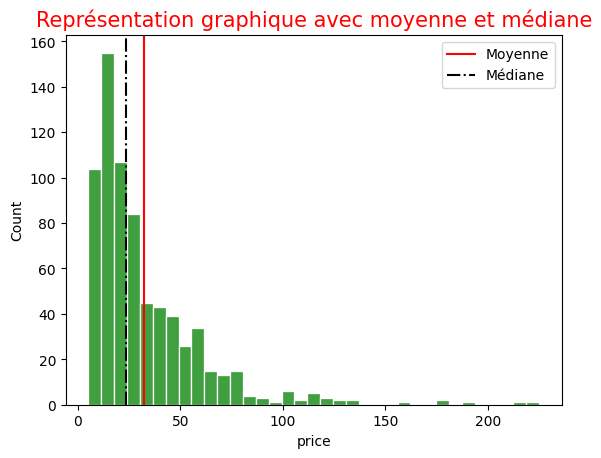

In [47]:
moyenne=Data_final['price'].mean()
médiane=Data_final['price'].median()
sns.histplot(data=Data_final,x='price',color='green',edgecolor='white')
plt.axvline(moyenne, color='Red',linestyle='-')
plt.axvline(médiane, color='black',linestyle='-.')

plt.legend({'Moyenne': moyenne,'Médiane':médiane})
plt.title(label='Représentation graphique avec moyenne et médiane',fontsize=15,color='red')

In [48]:
# Nous pouvons aussi calculer l'écart interquartile nous permettant de voir les outliers supérieur et inférieur à la médiane
Q1=Data_final['price'].quantile(q=0.25, interpolation='midpoint')
Q3=Data_final['price'].quantile(q=0.75, interpolation='midpoint')
IQ=Q3-Q1
Lim_outlier_inf=round((Q1-1.5*IQ),2)
Lim_outlier_sup=round((Q3+1.5*IQ),2)

Outliers_inf=Data_final['price']<Lim_outlier_inf
Outliers_sup=Data_final['price']>Lim_outlier_sup

print('Limites des outliers inférieurs',Lim_outlier_inf,'€')
print('Les index des outliers inférieurs sont : ',np.where(Outliers_inf[0],))

print('Limites des outliers supérieur',Lim_outlier_sup,'€')
print('Les index des outliers supérieur sont :',np.where(Outliers_sup)[0],)


Limites des outliers inférieurs -27.98 €
Les index des outliers inférieurs sont :  (array([], dtype=int64),)
Limites des outliers supérieur 84.22 €
Les index des outliers supérieur sont : [ 64  66 200 202 206 219 220 222 223 228 381 382 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]


In [49]:
print('Une limite outlier négatif n est pas possible dans notre étude car aucun prix ne peut être négatif, en revanche pour la limite supérieur nous pouvons détecter à travers les références restantes (32) lignes')  

Une limite outlier négatif n est pas possible dans notre étude car aucun prix ne peut être négatif, en revanche pour la limite supérieur nous pouvons détecter à travers les références restantes (32) lignes


In [63]:
Outlier_supérieur=Data_final.loc[Data_final['price']>84.22,('price','post_title','total_sales','stock_quantity')]
Outlier_supérieur

,price,post_title,total_sales,stock_quantity
64,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0,11
66,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0,5
200,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,0
202,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,2
206,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...,1.0,0
219,176.0,Cognac Frapin VIP XO,13.0,8
220,108.5,Cognac Frapin Château de Fontpinot XO,2.0,2
222,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,3
223,104.0,Cognac Frapin Cigar Blend,1.0,6
228,109.6,Château de Meursault Puligny-Montrachet 1er Cr...,0.0,7


In [62]:
print('Le total des ventes des Outliers est de' ,Outlier_supérieur['total_sales'].sum(),'ventes soit 6,30 % du total des ventes')
print("Le chiffre d'affaire de nos outliers est de",Outlier_supérieur['price'].sum(),'€ soit 5,64 % du CA')

Le total des ventes des Outliers est de 45.0 ventes soit 6,30 % du total des ventes
Le chiffre d'affaire de nos outliers est de 3986.3 € soit 5,64 % du CA


 On peut voir que nos Outliers sont supérieurs aux 3ème quartile et éloigné de notre médiane 


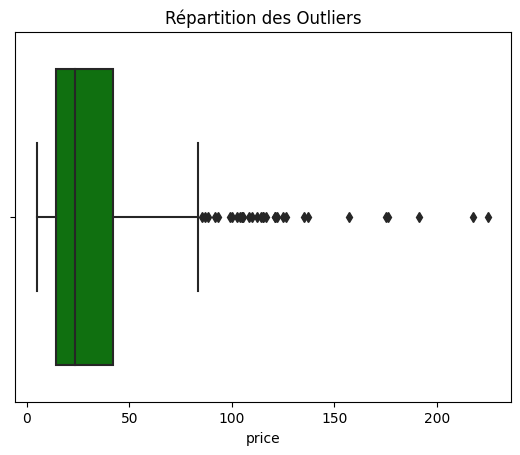

In [63]:
sns.boxplot(x=Data_final['price'],color='Green').set_title('Répartition des Outliers')
print(" On peut voir que nos Outliers sont supérieurs aux 3ème quartile et éloigné de notre médiane ")    

# Ce que nous pouvons en conclure c'est que les outliers dans notre cas ne dépasse pas le millier d'euros c'est à dire qu'il y a une certaine cohérence dans les prix des boissons et nous pouvons alors parler de valeurs atypiques.